In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)



(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
np.unique(training_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [4]:
training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    rotation_range=40,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1./255.)
    

print(training_images.shape)
print(testing_images.shape)


(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [5]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(25,activation='softmax')
])

# Compile Model. 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_gen=train_datagen.flow(training_images,
                            training_labels,
                            batch_size=64)
val_gen=validation_datagen.flow(testing_images,
                                testing_labels,
                               batch_size=64)

# Train the Model
history = model.fit_generator(train_gen,
                              epochs=25,
                             validation_data=val_gen)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/25
429/429 [==============================] - 49s 114ms/step - loss: 2.7288 - accuracy: 0.1711 - val_loss: 2.0025 - val_accuracy: 0.3596
Epoch 2/25
429/429 [==============================] - 43s 101ms/step - loss: 1.9777 - accuracy: 0.3779 - val_loss: 1.2059 - val_accuracy: 0.5870
Epoch 3/25
429/429 [==============================] - 44s 102ms/step - loss: 1.6071 - accuracy: 0.4832 - val_loss: 1.0117 - val_accuracy: 0.6358
Epoch 4/25
429/429 [==============================] - 44s 102ms/step - loss: 1.3515 - accuracy: 0.5583 - val_loss: 0.7971 - val_accuracy: 0.7263
Epoch 5/25
429/429 [==============================] - 45s 104ms/step - loss: 1.1552 - accuracy: 0.6236 - val_loss: 0.5867 - val_accuracy: 0.7927
Epoch 6/25
429/429 [==============================] - 42s 98ms/step - loss: 1.0156 - accuracy: 0.6692 - val_loss: 0.6368 - val_accuracy: 0.7821
Epoch 7/25
429/429 [==============================] - 42s 98ms/step - loss: 0.9272 - accuracy: 0.6966 - val_loss: 0.7293 - val_accu

[208.60405741838923, 0.68377024]

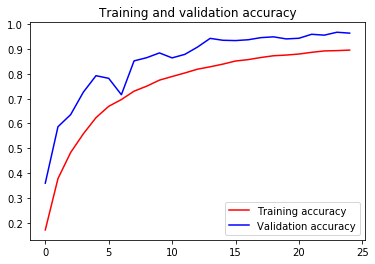

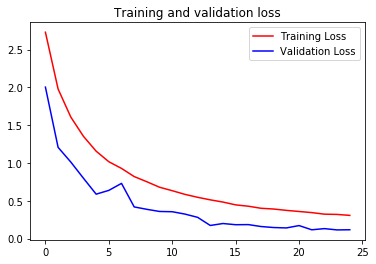

In [7]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()